In [1]:
import pandas as pd

In [2]:
vita_sites_df = pd.read_csv("./data/vita_sites_by_county.csv")
acs_df = pd.read_csv("./data/acs_household_income_county.csv")

In [3]:
vita_states = vita_sites_df.groupby('STATEFP', as_index=False).agg(
    number_vita_sites=pd.NamedAgg(column='id', aggfunc=pd.Series.nunique)
)

In [4]:
acs_statewide = acs_df.groupby('acs_state_fips', as_index=False).agg({
    'state_name': 'first',
    'hh_income_total_estimate': 'sum',
    'hh_income_less_than_60000': 'sum'
})

In [5]:
statewide_df = pd.merge(acs_statewide, vita_states,
                     left_on=['acs_state_fips'], right_on=['STATEFP'],
                     how='left')

In [6]:
statewide_df['VITA per 100,000 households'] = (statewide_df.number_vita_sites/statewide_df.hh_income_total_estimate) * 100000
statewide_df['VITA per 100,000 households under 60K'] = (statewide_df.number_vita_sites/statewide_df.hh_income_less_than_60000) * 100000
statewide_df['% households under 60K'] = (statewide_df.hh_income_less_than_60000/statewide_df.hh_income_total_estimate)*100

In [7]:
statewide_df[['state_name', 
              'number_vita_sites', 
              'VITA per 100,000 households',
              'VITA per 100,000 households under 60K',
              '% households under 60K']]

,state_name,number_vita_sites,"VITA per 100,000 households","VITA per 100,000 households under 60K",% households under 60K
0,Alabama,82,4.389973,7.630214,57.534077
1,Alaska,4,1.578868,4.184057,37.735350
2,Arizona,88,3.422436,6.737750,50.794939
3,Arkansas,47,4.058473,6.707942,60.502508
4,California,347,2.660173,6.491891,40.976855
5,Colorado,69,3.210805,7.710247,41.643346
6,Connecticut,81,5.909191,14.962925,39.492218
7,Delaware,9,2.477141,5.592250,44.295969
8,District of Columbia,9,3.164713,8.402812,37.662543
9,Florida,213,2.753250,5.175294,53.199878


<AxesSubplot:xlabel='% households under 60K', ylabel='VITA per 100,000 households under 60K'>

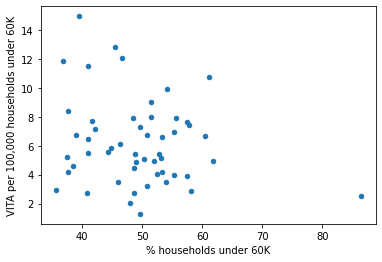

In [8]:
statewide_df.plot.scatter(x="% households under 60K", y="VITA per 100,000 households under 60K")

<AxesSubplot:xlabel='% households under 60K', ylabel='VITA per 100,000 households'>

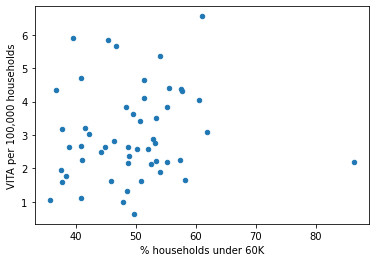

In [9]:
statewide_df.plot.scatter(x="% households under 60K", y="VITA per 100,000 households")

In [10]:
statewide_df.to_csv("./data/statewide_numbers.csv", index=False)